# <font color = 'darkblue'> Calculando la Resistencia para Mezclas de Concreto </font>
## <font color = 'blue'> Proyecto Final </font>
### `Integrantes:`
> **Cárdenas Gallardo Paula Daniela** | $733720$ <br> **Haces López José Manuel** | $734759$ <br> **Martin Vázquez Misael** | $721908$ <br> **Villa Domínguez Paulo Adrián** | $733773$
#### `Aprendizaje Máquina | Juan Antonio Vega Fernández`
**`Jueves 24 de Noviembre 2022`**

___
## <font color= 'Maroon'> Introducción </font>
**`Objetivos:`**
+ Generar modelos de aprendizaje supervisado para resolver un problema
+ Analizar un conjunto de datos y realizar el preprocesamiento necesario
+ Presentar un modelo a través de una aplicación de *deployment*
+ Contestar preguntas sobre el problema a trabajar


**`Preguntas iniciales:`**
1. **¿Cuál es el problema que se quiere resolver? ¿Qué preguntas esperaría contestar con el resultado?**

El problema que se resolverá es sobre la fuerza del cemento. El concreto es muy importante en la ingeniería civil, la cual es un área de interés en nuestro equipo. La resistencia que tiene el concreto es una función no-lineal de su edad y los ingredientes con los cuales fue hecho. Dichos ingredientes incluyen el cemento, la escoria de horno, las cenizas, agua, superplastificante, agregado grueso y agregado fino. 
La preguntas esperadas son:

    1. ¿Qué preprocesamiento es necesario para utilizar los datos?
    2. ¿Qué modelo nos ayuda a realizar mejores predicciones?
    3. ¿Qué conclusiones obtenemos al respecto?

2. **¿Qué datos son necesario y están disponibles para resolver el problema? ¿Existe un dataset que se pueda utilizar? ¿Es factible generar un dataset?**

Los datos que funcionan para este problema es un *dataset* disponible es [kaggle.com](https://www.kaggle.com/datasets/niteshyadav3103/concrete-compressive-strength) y sí es factible utilizarlo para el problema.

3. **¿Qué tipos de análisis espera realizar con los datos?**

Encontrar las variables más importantes para entender la fuerza del cemento para futuros proyectos dentro de la ingeniería civil.

4. **¿Qué resultados se espera tener? ¿Cuál es el rendimiento mínimo que considera útil para su modelo?**

Consideramos que una $R^2$ de $0.75$ o mayor ya es un buen desempeño.

**`Conjunto de datos:`**

| Variables               | ¿In/Dependiente? | Unidad |
|-------------------------|------------------|----------|
| `Cement`                | Indendiente      | $kg$ in a $m^3$ mixture |
| `Blast Furnace Slag`    | Indendiente      | $kg$ in a $m^3$ mixture |
| `Fly Ash`               | Indendiente      | $kg$ in a $m^3$ mixture |
| `Water`                 | Indendiente      | $kg$ in a $m^3$ mixture |
| `Super-plasticizer`     | Indendiente      | $kg$ in a $m^3$ mixture |
| `Coarse Aggregate`      | Indendiente      | $kg$ in a $m^3$ mixture |
| `Fine Aggregate`        | Indendiente      | $kg$ in a $m^3$ mixture |
| `Age`                   | Indendiente      | Day ($1 - 365$) |
| `Strength of the Cement`| Dependiente      | $MPa$ |


___
## <font color= 'Maroon'> Análisis Exploratorio de Datos </font>

In [1]:
# Librerías
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.svm import SVR
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Importar datos
data = pd.read_csv("Data/concrete_data.csv")
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# Dimensión de los datos
print(f"Tenemos una base de datos con: {data.shape[0]} filas y {data.shape[1]} columnas")

Tenemos una base de datos con: 1030 filas y 9 columnas


In [4]:
# Observar datos nulos
data.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

No contamos con datos nulos

In [5]:
# Resumen estadístico de las variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


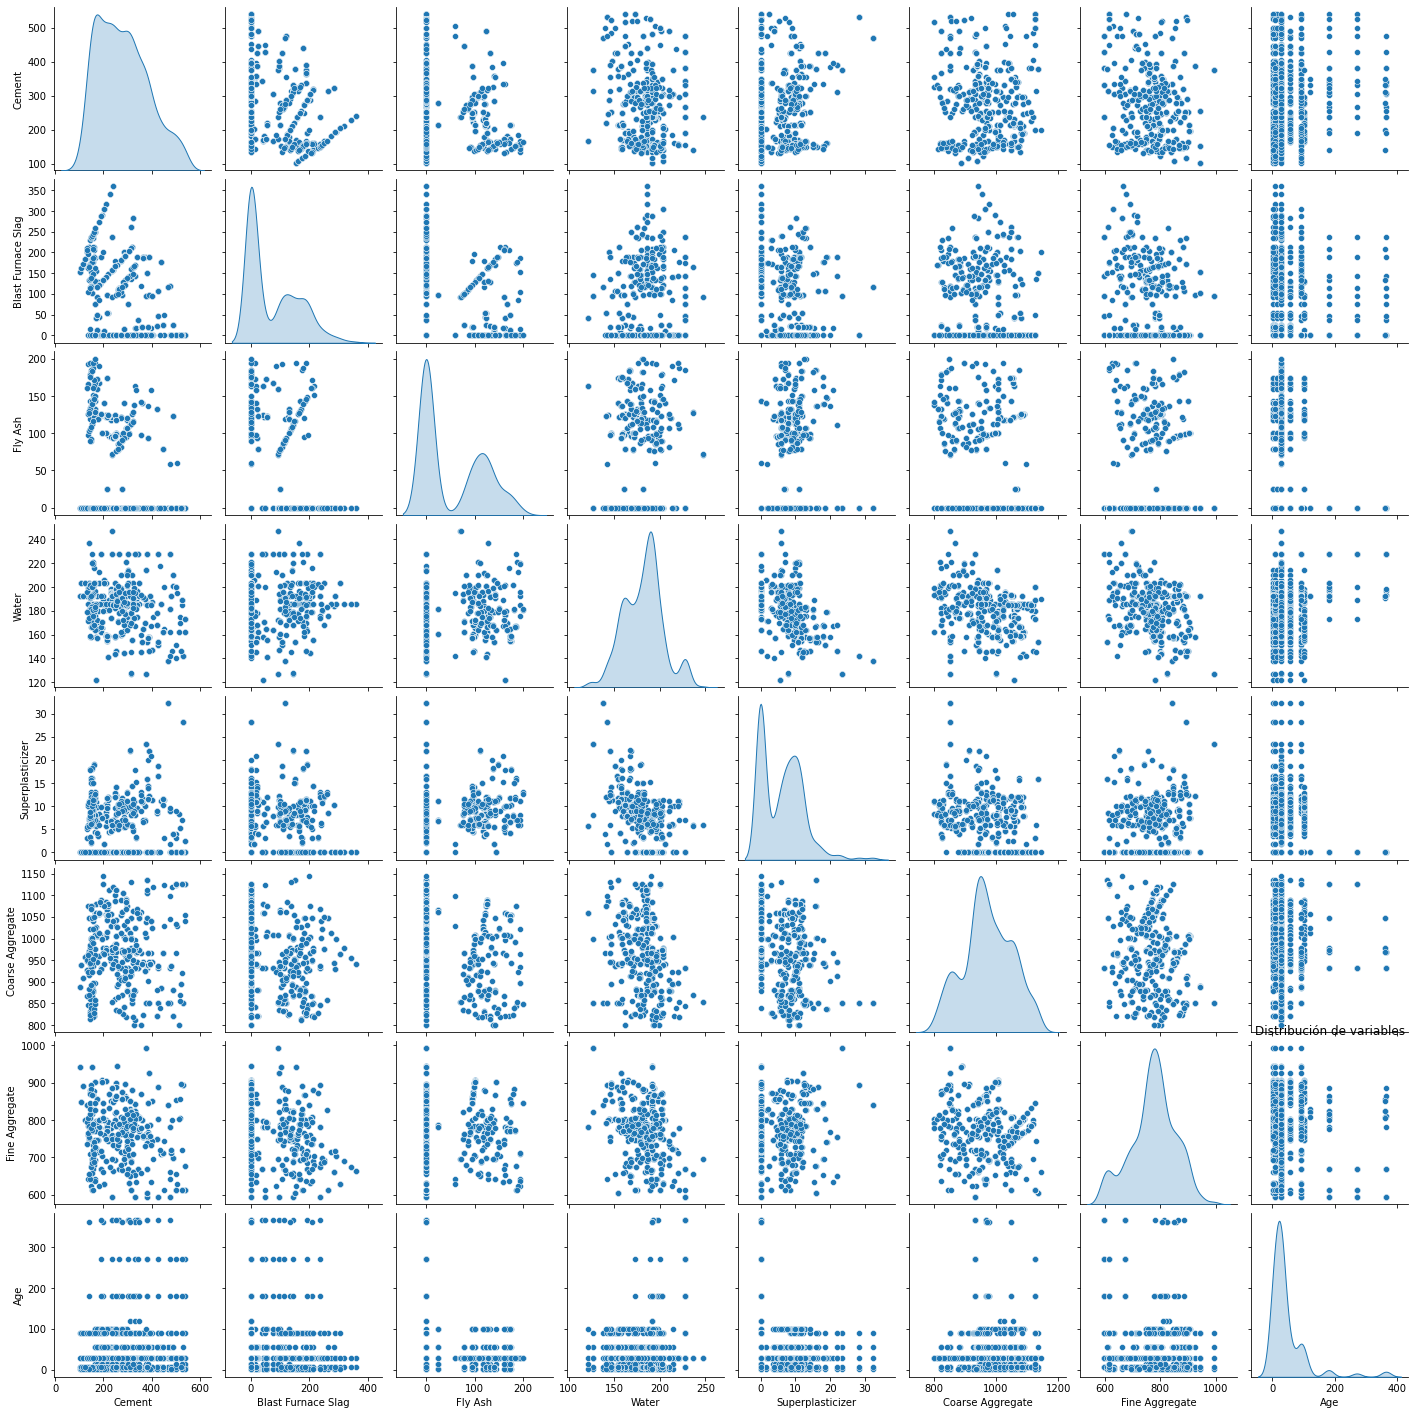

In [6]:
# Distribución de las variables predictoras
sns.pairplot(data[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                   'Coarse Aggregate', 'Fine Aggregate', 'Age']], diag_kind='kde')
plt.title('Distribución de variables')
plt.show()

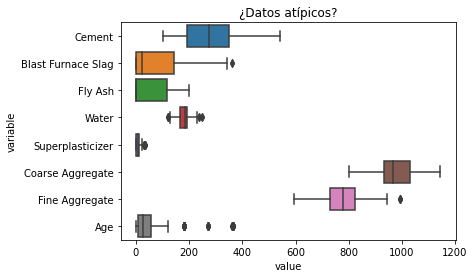

In [7]:
# Visualización de datos atípicos con boxplots
sns.boxplot(x="value", y="variable", data=pd.melt(data.drop(columns=["Strength"])))
plt.title('¿Datos atípicos?')
plt.show()

___
## <font color= 'Maroon'> Selección de Variables </font>
### <font color= 'Maroon'> *Método de correlación* </font>

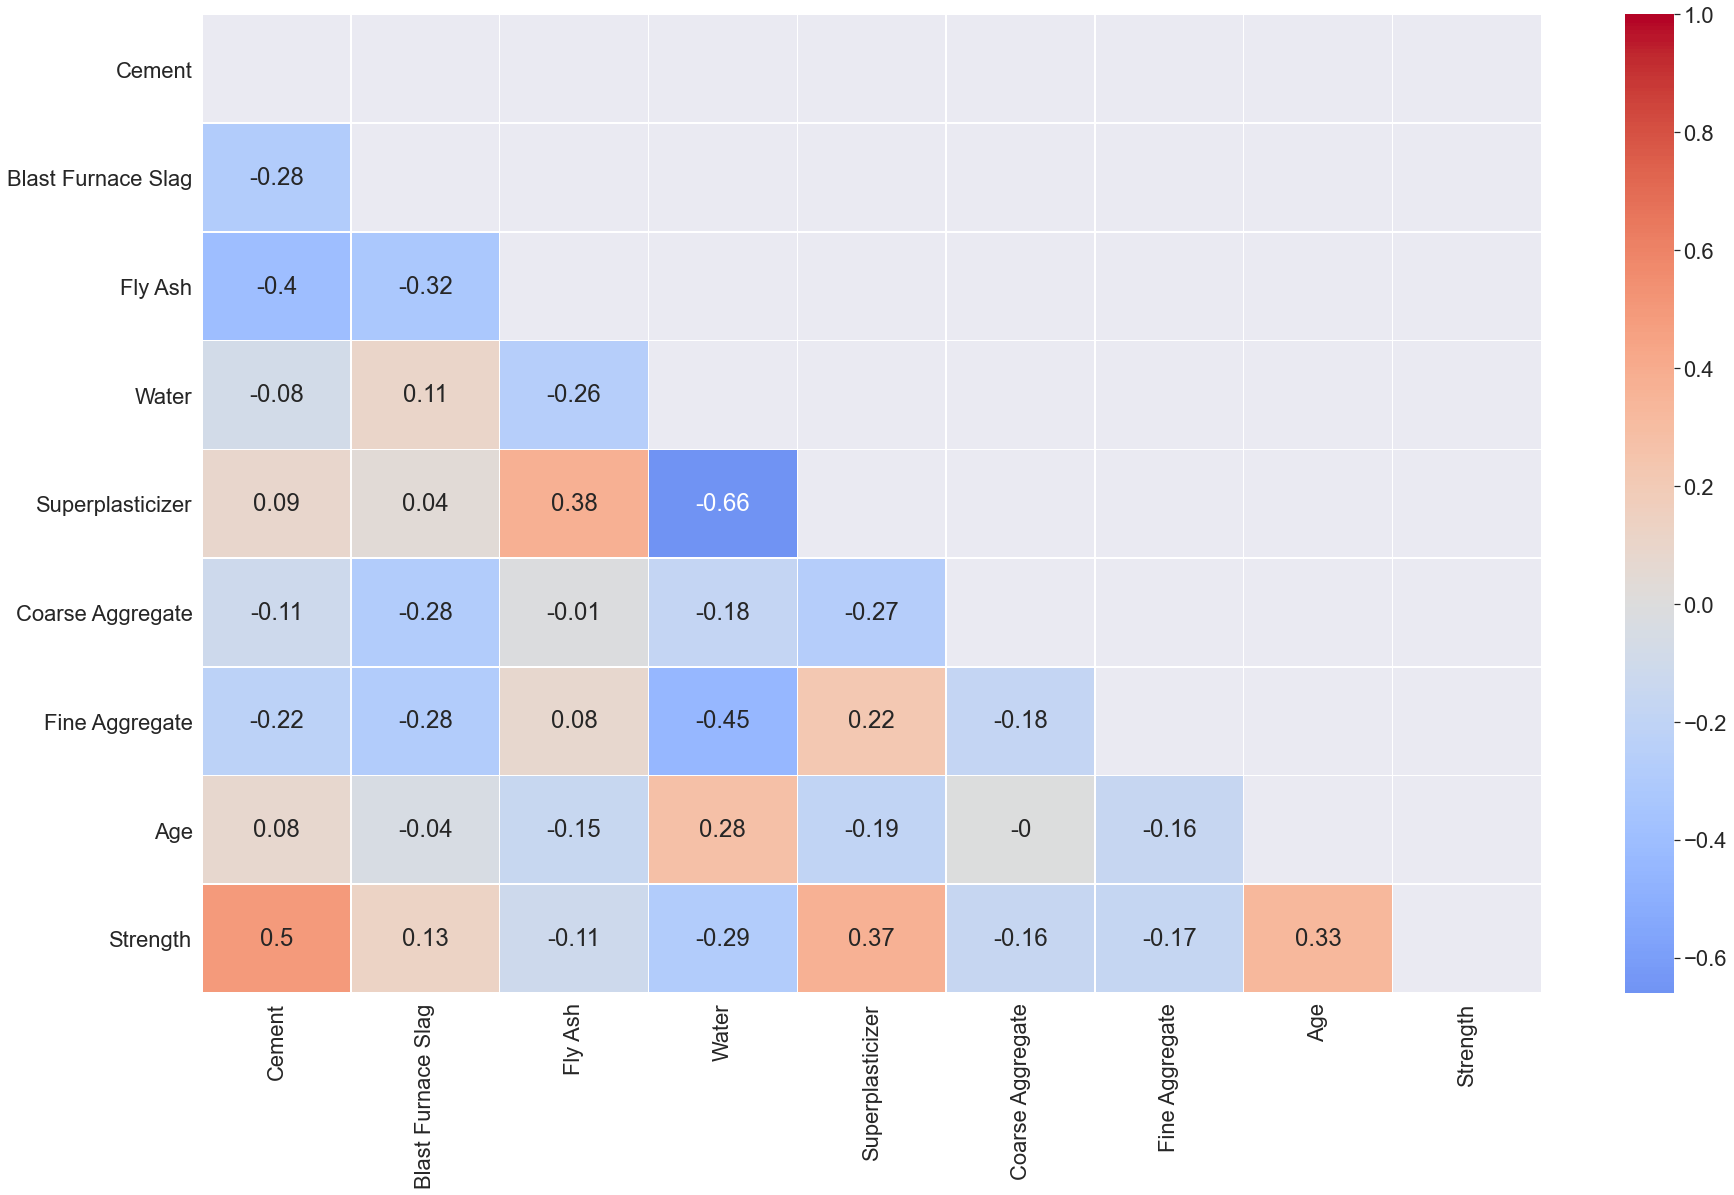

In [8]:
# Correlación
corr = data.corr()
# Limitar a la giagonal inferior de la matriz
low_diag = np.triu(corr)
# Formato
sns.set(font_scale=2)
plt.figure(figsize=(30,18))
sns.heatmap(data=corr.round(2), vmax=1, center=0, annot=True, cmap='coolwarm', linewidths=0.5, mask=low_diag)
plt.show()

Las variables con menos correlación son:

- `Fly Ash`
- `Blast Furnance Slag`
- `Coarse Aggregate`
- `Fine Aggregate`

Las eliminamos para el modelado de los datos.

In [9]:
# División de prueba y entranamiento
data_model = data.drop(columns=["Fly Ash", "Blast Furnace Slag", "Coarse Aggregate", "Fine Aggregate"])

X_train, X_test, y_train, y_test = train_test_split(data_model.drop(columns=["Strength"]),
                                                    data_model["Strength"],
                                                    test_size=0.2,
                                                    random_state=69)

print(f"Nuestro conjunto de datos de entrenamiento tiene un tamaño de {X_train.shape[0]} filas.")

Nuestro conjunto de datos de entrenamiento tiene un tamaño de 824 filas.


___
## <font color= 'Maroon'> Modelado </font>

**`SVM`**

In [10]:
# Crear modelo
kfold = KFold(n_splits=5, random_state=69, shuffle=True)

# Gridsearch
tuned_parameters = [{'kernel': ['rbf'],
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

model = SVR()

gs = GridSearchCV(model,
                  tuned_parameters,
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [11]:
# Desempeño
model_svr = SVR(kernel='rbf', C=100, gamma=0.001)
model_svr.fit(X_train, y_train)
yhat = model_svr.predict(X_test)
R2_score = r2_score(y_test,yhat)
print('R2:', R2_score)

R2: 0.7620067213899577


**`Random Forest`**

In [12]:
# Crear modelo
kfold = KFold(n_splits=5, random_state=69, shuffle=True)
model_randomF = RandomForestRegressor(
                               min_samples_leaf=1,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

# Grid search para optimizar hiperparámetros
gs_randomF = GridSearchCV(
    model_randomF,
    param_grid = {'max_depth': range(1, 11),
                  'min_samples_split': range(10, 60, 10),
                  'n_estimators': [100, 300, 500, 800],
                  'criterion': ['mse']},
    cv=kfold,
    scoring='neg_mean_squared_error')

gs_randomF.fit(X_train, y_train)
print(gs_randomF.best_params_)

{'criterion': 'mse', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 800}


In [13]:
# Creamos el modelo con los hiperparámetros.
model_RF = RandomForestRegressor(n_estimators=800,
                               criterion='mse',
                               max_depth=10,
                               min_samples_split=10,
                               min_samples_leaf=1,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Entreno modelo optimizado
model_RF.fit(X_train, y_train)

# Desempeño
yhat = model_RF.predict(X_test)
R2_score_rf = r2_score(y_test,yhat)
print('R2:', R2_score_rf)

R2: 0.8362918376049743


**`Árbol de Decisión`**

In [14]:
# Crear modelo de prueba
model_tree_gs = DecisionTreeRegressor()

gs = GridSearchCV(model_tree_gs,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)
print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 20}


In [15]:
# Crear modelo usando parámetros óptimos
model_tree = DecisionTreeRegressor(max_depth=7,
                                  min_samples_split=20)
model_tree.fit(X_train, y_train)

# Desempeño
yhat = model_tree.predict(X_test)
R2_score_tree = r2_score(y_test,yhat)
print('R2:', R2_score_tree)

R2: 0.7691766654374343


**`Red Neuronal`**

In [16]:
# Diseño del modelo
model_NN = Sequential()
# Capa Input
model_NN.add(Dense(50, activation='relu', input_dim=4, name='input_layer'))
# Capa Oculta
model_NN.add(Dense(60, activation='relu', name='hidden_layer'))
#Agregamos la capa de salida
model_NN.add(Dense(1, activation='linear',name='output_layer'))

# Compilamos el modelo
model_NN.compile(loss='mean_squared_error',
                optimizer="adam",
                metrics = ['mse'])

In [17]:
# Ajustar el modelo
history = model_NN.fit(X_train, y_train,
                   epochs=200,
                   batch_size=100,
                   validation_data=(X_test,y_test))

Epoch 1/200
9/9 [==============================] - 2s 20ms/step - loss: 1735.1899 - mse: 1735.1899 - val_loss: 759.3690 - val_mse: 759.3690
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 820.7318 - mse: 820.7318 - val_loss: 342.4958 - val_mse: 342.4958
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 360.3820 - mse: 360.3820 - val_loss: 380.3670 - val_mse: 380.3670
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 312.2574 - mse: 312.2574 - val_loss: 205.2010 - val_mse: 205.2010
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 244.1102 - mse: 244.1102 - val_loss: 168.5597 - val_mse: 168.5597
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 203.7425 - mse: 203.7425 - val_loss: 156.0340 - val_mse: 156.0340
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 179.4052 - mse: 179.4052 - val_loss: 144.8057 - val_mse: 144.8057
Epoch 8/200
9/9 [=====================

9/9 [==============================] - 0s 3ms/step - loss: 83.3926 - mse: 83.3926 - val_loss: 91.2564 - val_mse: 91.2564
Epoch 62/200
9/9 [==============================] - 0s 3ms/step - loss: 82.7714 - mse: 82.7714 - val_loss: 90.3630 - val_mse: 90.3630
Epoch 63/200
9/9 [==============================] - 0s 4ms/step - loss: 85.7986 - mse: 85.7986 - val_loss: 91.8571 - val_mse: 91.8571
Epoch 64/200
9/9 [==============================] - 0s 3ms/step - loss: 83.4459 - mse: 83.4459 - val_loss: 94.4931 - val_mse: 94.4931
Epoch 65/200
9/9 [==============================] - 0s 3ms/step - loss: 85.7682 - mse: 85.7682 - val_loss: 93.2706 - val_mse: 93.2706
Epoch 66/200
9/9 [==============================] - 0s 3ms/step - loss: 84.3554 - mse: 84.3554 - val_loss: 89.3997 - val_mse: 89.3997
Epoch 67/200
9/9 [==============================] - 0s 3ms/step - loss: 82.7487 - mse: 82.7487 - val_loss: 89.1286 - val_mse: 89.1286
Epoch 68/200
9/9 [==============================] - 0s 4ms/step - loss: 82.

9/9 [==============================] - 0s 6ms/step - loss: 78.4326 - mse: 78.4326 - val_loss: 94.8821 - val_mse: 94.8821
Epoch 123/200
9/9 [==============================] - 0s 5ms/step - loss: 85.4086 - mse: 85.4086 - val_loss: 86.3257 - val_mse: 86.3257
Epoch 124/200
9/9 [==============================] - 0s 5ms/step - loss: 85.4684 - mse: 85.4684 - val_loss: 82.8081 - val_mse: 82.8081
Epoch 125/200
9/9 [==============================] - 0s 5ms/step - loss: 77.0978 - mse: 77.0978 - val_loss: 101.9704 - val_mse: 101.9704
Epoch 126/200
9/9 [==============================] - 0s 4ms/step - loss: 85.1152 - mse: 85.1152 - val_loss: 108.8674 - val_mse: 108.8674
Epoch 127/200
9/9 [==============================] - 0s 4ms/step - loss: 94.6250 - mse: 94.6250 - val_loss: 93.8433 - val_mse: 93.8433
Epoch 128/200
9/9 [==============================] - 0s 4ms/step - loss: 80.0346 - mse: 80.0346 - val_loss: 82.7872 - val_mse: 82.7872
Epoch 129/200
9/9 [==============================] - 0s 3ms/step 

9/9 [==============================] - 0s 4ms/step - loss: 68.9843 - mse: 68.9843 - val_loss: 73.8133 - val_mse: 73.8133
Epoch 183/200
9/9 [==============================] - 0s 3ms/step - loss: 71.2345 - mse: 71.2345 - val_loss: 73.2372 - val_mse: 73.2372
Epoch 184/200
9/9 [==============================] - 0s 4ms/step - loss: 73.6752 - mse: 73.6752 - val_loss: 72.7229 - val_mse: 72.7229
Epoch 185/200
9/9 [==============================] - 0s 4ms/step - loss: 68.6881 - mse: 68.6881 - val_loss: 76.3754 - val_mse: 76.3754
Epoch 186/200
9/9 [==============================] - 0s 4ms/step - loss: 69.7618 - mse: 69.7618 - val_loss: 73.0963 - val_mse: 73.0963
Epoch 187/200
9/9 [==============================] - 0s 5ms/step - loss: 70.3613 - mse: 70.3613 - val_loss: 76.0016 - val_mse: 76.0016
Epoch 188/200
9/9 [==============================] - 0s 3ms/step - loss: 68.8522 - mse: 68.8522 - val_loss: 75.3442 - val_mse: 75.3442
Epoch 189/200
9/9 [==============================] - 0s 4ms/step - lo

In [18]:
# Desempeño
yhat = model_NN.predict(X_test)
R2_score_NN = r2_score(y_test, yhat)
print('R2:', R2_score_NN)

R2: 0.7434426475509315


In [19]:
# Diseño del modelo
model_NN_2 = Sequential()
# Capas de input
model_NN_2.add(Dense(50, activation='relu', input_dim=4, name='input_layer'))
# Capas ocultas
model_NN_2.add(Dense(70, activation='relu', name='hidden_layer'))
model_NN_2.add(Dense(60, activation='relu', name='hidden_layer_2'))
# Agregar la capa de salida
model_NN_2.add(Dense(1, activation='linear',name='output_layer'))

model_NN_2.compile(loss='mean_squared_error',
                    optimizer="adam",
                    metrics = ['mse'])

In [20]:
# Ajustar el modelo
history_2 = model_NN_2.fit(X_train, y_train,
                   epochs=200,
                   batch_size=100,
                   validation_data=(X_test,y_test))

Epoch 1/200
9/9 [==============================] - 0s 16ms/step - loss: 281.4451 - mse: 281.4451 - val_loss: 181.0806 - val_mse: 181.0806
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 196.8339 - mse: 196.8339 - val_loss: 182.5289 - val_mse: 182.5289
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 178.7366 - mse: 178.7366 - val_loss: 149.2169 - val_mse: 149.2169
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 153.2867 - mse: 153.2867 - val_loss: 134.9254 - val_mse: 134.9254
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 136.1413 - mse: 136.1413 - val_loss: 127.3353 - val_mse: 127.3353
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 127.0833 - mse: 127.0833 - val_loss: 121.8315 - val_mse: 121.8315
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 118.1797 - mse: 118.1797 - val_loss: 107.4563 - val_mse: 107.4563
Epoch 8/200
9/9 [=======================

Epoch 62/200
9/9 [==============================] - 0s 5ms/step - loss: 61.8499 - mse: 61.8499 - val_loss: 66.1949 - val_mse: 66.1949
Epoch 63/200
9/9 [==============================] - 0s 4ms/step - loss: 61.2048 - mse: 61.2048 - val_loss: 66.6194 - val_mse: 66.6194
Epoch 64/200
9/9 [==============================] - 0s 5ms/step - loss: 62.4666 - mse: 62.4666 - val_loss: 72.7125 - val_mse: 72.7125
Epoch 65/200
9/9 [==============================] - 0s 4ms/step - loss: 63.7972 - mse: 63.7972 - val_loss: 71.7176 - val_mse: 71.7176
Epoch 66/200
9/9 [==============================] - 0s 5ms/step - loss: 64.7002 - mse: 64.7002 - val_loss: 67.9372 - val_mse: 67.9372
Epoch 67/200
9/9 [==============================] - 0s 4ms/step - loss: 64.6143 - mse: 64.6143 - val_loss: 67.8951 - val_mse: 67.8951
Epoch 68/200
9/9 [==============================] - 0s 4ms/step - loss: 61.3697 - mse: 61.3697 - val_loss: 66.7307 - val_mse: 66.7307
Epoch 69/200
9/9 [==============================] - 0s 3ms/ste

Epoch 123/200
9/9 [==============================] - 0s 4ms/step - loss: 62.4596 - mse: 62.4596 - val_loss: 63.7766 - val_mse: 63.7766
Epoch 124/200
9/9 [==============================] - 0s 4ms/step - loss: 58.5015 - mse: 58.5015 - val_loss: 64.2733 - val_mse: 64.2733
Epoch 125/200
9/9 [==============================] - 0s 4ms/step - loss: 60.9199 - mse: 60.9199 - val_loss: 66.1465 - val_mse: 66.1465
Epoch 126/200
9/9 [==============================] - 0s 4ms/step - loss: 58.6111 - mse: 58.6111 - val_loss: 66.4661 - val_mse: 66.4661
Epoch 127/200
9/9 [==============================] - 0s 5ms/step - loss: 61.0613 - mse: 61.0613 - val_loss: 63.7308 - val_mse: 63.7308
Epoch 128/200
9/9 [==============================] - 0s 4ms/step - loss: 60.6829 - mse: 60.6829 - val_loss: 66.3410 - val_mse: 66.3410
Epoch 129/200
9/9 [==============================] - 0s 5ms/step - loss: 67.5225 - mse: 67.5225 - val_loss: 71.7887 - val_mse: 71.7887
Epoch 130/200
9/9 [==============================] - 0s

9/9 [==============================] - 0s 5ms/step - loss: 56.1095 - mse: 56.1095 - val_loss: 63.0776 - val_mse: 63.0776
Epoch 184/200
9/9 [==============================] - 0s 4ms/step - loss: 55.1962 - mse: 55.1962 - val_loss: 64.1897 - val_mse: 64.1897
Epoch 185/200
9/9 [==============================] - 0s 4ms/step - loss: 55.6563 - mse: 55.6563 - val_loss: 62.0719 - val_mse: 62.0719
Epoch 186/200
9/9 [==============================] - 0s 3ms/step - loss: 55.4308 - mse: 55.4309 - val_loss: 63.4889 - val_mse: 63.4889
Epoch 187/200
9/9 [==============================] - 0s 4ms/step - loss: 56.8488 - mse: 56.8488 - val_loss: 65.1215 - val_mse: 65.1215
Epoch 188/200
9/9 [==============================] - 0s 5ms/step - loss: 55.9822 - mse: 55.9822 - val_loss: 63.9940 - val_mse: 63.9940
Epoch 189/200
9/9 [==============================] - 0s 4ms/step - loss: 58.8436 - mse: 58.8436 - val_loss: 64.7027 - val_mse: 64.7027
Epoch 190/200
9/9 [==============================] - 0s 5ms/step - lo

In [21]:
# Desempeño
yhat = model_NN_2.predict(X_test)
R2_score_NN_2 = r2_score(y_test, yhat)
print('R2:', R2_score_NN_2)

R2: 0.7703485302987414


___
## <font color= 'Maroon'> Interpretación de Resultados </font>

In [22]:
# Crear tabla con los resultados
results={
    'Modelo':
       ['SVM','Tree Regressor','Random Forest', "NN", "NN_2"],
   'R2':
       [R2_score, R2_score_tree, R2_score_rf, R2_score_NN, R2_score_NN_2]}

results = pd.DataFrame(results)
results

,Modelo,R2
0,SVM,0.762007
1,Tree Regressor,0.769177
2,Random Forest,0.836292
3,NN,0.743443
4,NN_2,0.770349


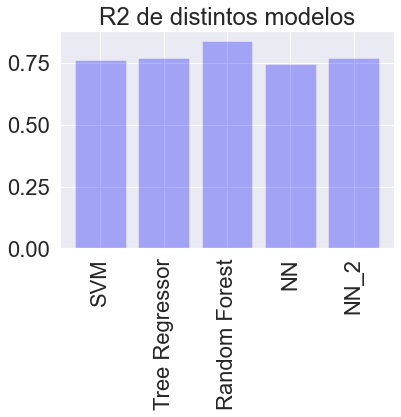

In [23]:
# Visualizar los desempeños
variables = list(results["Modelo"])
plt.bar(list(results["Modelo"]), list(results["R2"]), color="blue", alpha=0.3)
plt.title('R2 de distintos modelos')
plt.xticks(rotation=90)
plt.show()

___
## <font color= 'Maroon'> Guardar el mejor modelo </font>
El modelo que mejor rendimiento tuvo fue el *Random Forest*. Lo guardamos como *pickle* para poder importarlo en la aplicación.

In [24]:
# Guardar el modelo
import pickle
filename = 'rf_regressor.pkl'
pickle.dump(model_RF, open(filename,'wb'))

___
## <font color= 'Maroon'> Resolución a Preguntas Iniciales </font>
1. **¿Qué preprocesamiento es necesario para utilizar los datos?** <br>
    + Selección de variables

2. **¿Qué modelo nos ayuda a realizar mejores predicciones?** <br>
    `Random Forest`

3. **¿Qué conclusiones obtenemos al respecto?** <br>
    + Todos los modelos seleccionados tuvieron un buen desempeño
    + Las variables más útiles para dicho modelo fueron
        + `Cement`
        + `Water`
        + `Superplasticizer`
        + `Age`
        + `Strength`

___
## <font color= 'Maroon'> Referencias Bibliográficas </font>
Yadav, N. (2020). *Concrete Compressive Strength*. Consultado el 14 de noviembre de 2022, de [kaggle.com](https://www.kaggle.com/datasets/niteshyadav3103/concrete-compressive-strength)